In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [2]:
pop = pd.read_csv("./examples/QED_SA_BA2coeff211_step500/pop.csv")

In [3]:
pop

,smiles,n_success_mut,n_failures_mut,qed,SAScore,BA,total,history_data
0,C,5,3,0.359785,7.328415,3.276491,11.324476,C
1,O,4,0,0.327748,5.868477,0.924758,7.448730,NaN
2,Cl,2,7,0.365164,6.251046,6.451325,13.432700,NaN
3,F,5,12,0.350795,6.635277,7.582741,14.919608,NaN
4,FCl,5,0,0.388576,3.966953,7.164080,11.908185,NaN
...,...,...,...,...,...,...,...,...
4995,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4996,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4997,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4998,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
pop[(pop['qed'] > 0.4) & (pop['SAScore']>0.4)].to_csv('./pop.csv',index=0)

In [5]:
pop = pop.dropna(subset=['smiles'])

In [6]:
pop = pop.dropna(subset=['BA'])

In [7]:
pop = pop[(pop['qed'] > 0.4) & (pop['SAScore']>0.4)]

/home/minjae/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BA'>

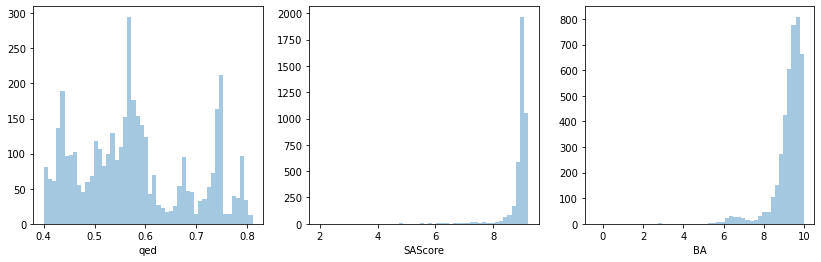

In [8]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
sns.distplot(pop['qed'], kde=False, bins=50, ax=axes[0])
sns.distplot(pop['SAScore'], kde=False, bins=50, ax=axes[1])
sns.distplot(pop['BA'], kde=False, bins=50, ax=axes[2])

In [9]:
pop['scaffold'] = pop['smiles'].apply(MurckoScaffold.MurckoScaffoldSmilesFromSmiles)

In [10]:
pop = pop[pop.groupby("scaffold")['BA'].transform(max)==pop['BA']]

In [11]:
pop

,smiles,n_success_mut,n_failures_mut,qed,SAScore,BA,total,history_data,scaffold
6,ClCl,3,1,0.404263,3.966629,7.146647,11.921802,NaN,
30,C1CCPOC1,2,0,0.421795,5.403580,6.039506,12.286676,NaN,C1CCPOC1
48,OC1=PO1,0,0,0.421702,5.470846,6.152075,12.466325,NaN,C1=PO1
59,BrSCC1CSP1,5,0,0.651988,6.638808,6.487530,14.430314,NaN,C1CSP1
61,o1o[pH]1,3,0,0.418775,6.675049,6.723192,14.235791,NaN,o1o[pH]1
...,...,...,...,...,...,...,...,...,...
4940,FC=C1C23C45C67C89S2%10NS168(OCl)C4%10S5379Cl,0,0,0.751836,9.062169,9.751748,20.317590,NaN,C=C1C23C45C67C89S2%10N[SH]168C4%10[SH]5379
4944,OC[SH]123CC4C15S16OS45(CBr)(C12)C63,0,0,0.460644,8.595476,9.562290,19.079053,NaN,C1C2C34S15C1S36O[SH]214C56
4946,FC[SH]12(OCl)CC34C5C6[SH](N1)C32[SH]654Cl,0,0,0.461583,8.059111,8.342412,17.324687,NaN,C1[SH]2N[SH]3C4C5C16C23S456
4952,FC1C23C#S45NS167(OCl)C18C29C46S391(Cl)C857,0,0,0.748881,9.135573,9.503240,20.136574,NaN,C1#S23N[SH]456CC17C18C49C25[SH]719C836


<AxesSubplot:xlabel='BA', ylabel='qed'>

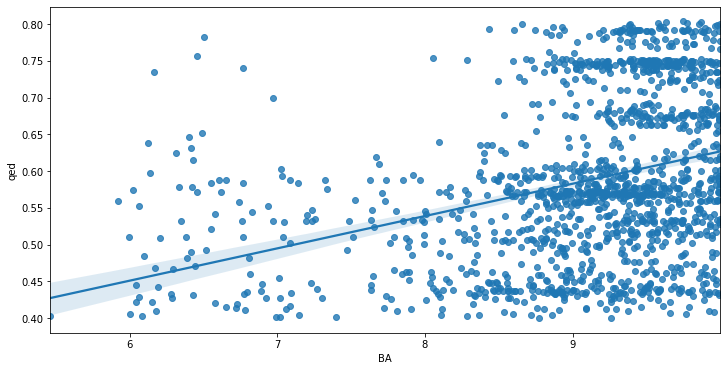

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.regplot(x=pop['BA'],y=pop['qed'], ax=ax)
#sns.regplot(x=pop['mjnet'],y=pop['SAScore'], ax=axes[1])

<AxesSubplot:xlabel='BA', ylabel='SAScore'>

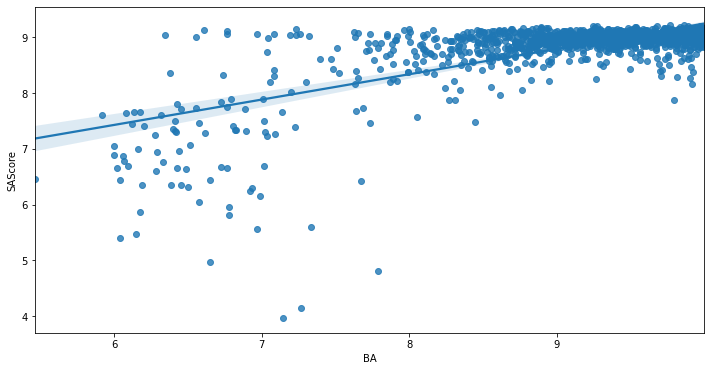

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.regplot(x=pop['BA'],y=pop['SAScore'], ax=ax)

In [14]:
len(pop['scaffold'].unique())

1409

In [15]:
pop.sort_values(['BA'])

,smiles,n_success_mut,n_failures_mut,qed,SAScore,BA,total,history_data,scaffold
106,C1=CPOC1,0,0,0.403039,6.454901,5.461497,12.722475,NaN,C1=CPOC1
198,PP(Br)C1C[SH](Cl)O1,0,0,0.559663,7.607452,5.921376,14.648155,NaN,C1CSO1
260,FS1=C(CPBr)CO1,0,0,0.510756,6.890727,5.996764,13.909004,NaN,C1=[SH]OC1
254,F[SH]1(=CPBr)CCO1,0,0,0.404924,7.044910,6.002751,13.857509,NaN,C=S1CCO1
186,CS1(F)CC(PBr)COC1S,0,0,0.574109,6.663824,6.017987,13.830029,NaN,C1COCSC1
...,...,...,...,...,...,...,...,...,...
3852,OCS1234CCC56C1C21S27OS51(CBr)(C23)C674,0,0,0.620089,8.879938,9.997323,20.117440,NaN,C1C[SH]234C5C16C21S27O[SH]61(C23)C574
3799,CC[SH]123NS456(OCl)C(F)C17C18C49C25S179(Cl)C836,0,0,0.602032,9.030815,9.998112,20.232992,NaN,C1C23C45C67C89S2%10N[SH]168C4%10[SH]5379
1176,CS123(O)C45C6CPS78C41S614(Br)C5(C721)C834,7,0,0.535380,9.164686,9.999085,20.234531,NaN,C1PS23C45C67C1[SH]418C64C21S75C438
2912,COCS1234COS56C17C21CS728(CO)C1(C532)C648,0,0,0.765703,8.822571,9.999675,20.353651,NaN,C1OS23C45C67C[SH]489C64C28[SH]175C439


In [ ]:
IPythonConsole.ipython_useSVG=False

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

for smi in pop.sort_values("BA").iloc[-10:].smiles:
    print(smi)
    print(pop[pop['smiles'] == smi]['BA'])
    print(pop[pop['smiles'] == smi]['qed'])
    print(pop[pop['smiles'] == smi]['SAScore'])
    mol = Chem.MolFromSmiles(smi)

    display(mol)

print('------------------------------------------------------------------')
    
for smi in pop[(pop["qed"]>0.7) & (pop["SAScore"]>8) & (pop['BA'] > 9)].sort_values("BA").iloc[-10:].smiles:
    #if pop[pop['BA'] == smi]['BA'] > 10:
    print(smi)
    print(pop[pop['smiles'] == smi]['BA'])
    mol = Chem.MolFromSmiles(smi)

    display(mol)



In [16]:
for smi in pop['history_data'].unique():
    if type(smi)==str:
        mol = Chem.MolFromSmiles(smi)
        display(mol)
